In [10]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn
matplotlib.style.use('seaborn')
import torch as T
from agent_code.dqn_agent.dqn_model import DQN, Buffer

In [11]:
def latest(d):
    def steps(name):
        return int(name.split('step-')[-1].split('_interval')[0])
    def date(name):
        return datetime.datetime.fromisoformat(name.split('_')[0][6:])
    flist = np.array([[f, date(f), steps(f)] for f in os.listdir(d) if os.path.isfile(d+f)])
    return flist[np.argmax(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])][0]

In [12]:
last = True
directory = './agent_code/dqn_agent/models/'
name = ''

In [13]:
name = latest(directory) if last else name
print('Model name:', name)
interval = int(name.split('interval-')[1].split('.pth')[0])
data = T.load('./agent_code/dqn_agent/models/' + name)['analysis']
print(f'Lenght of analysis data: {len(data)}')
data = np.array(data)
steps = np.arange(0, data.shape[0] * interval, interval) + interval
print(f'This corresponds to {np.max(steps)} training steps.')
print('Excerpt of the data:\n',data[0])

Model name: model-2019-03-18 03:10:04_step-8000_interval-100.pth
Lenght of analysis data: 40
This corresponds to 4000 training steps.
Excerpt of the data:
 {'action': 2.4, 'reward': -8.2, 'epsilon': 0.9735793812418548, 'explored': 1.0, 'loss': 163.19191}


In [14]:
action = [step['action'] for step in data]
reward = [step['reward'] for step in data]
epsilon = [step['epsilon'] for step in data]
explored = [step['explored'] for step in data]
loss = [step['loss'] for step in data]

### Plot of action taken in each step

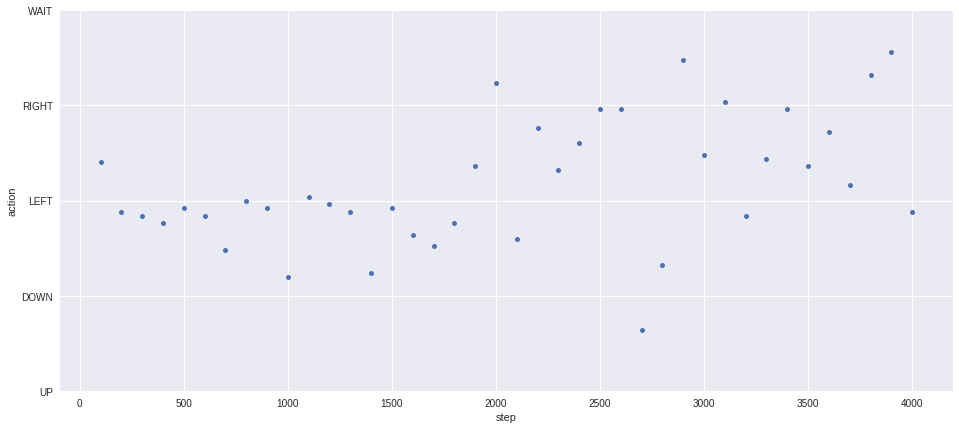

In [32]:
plt.figure(figsize=(16, 7))
plt.yticks((0, 1, 2, 3, 4), ('UP', 'DOWN', 'LEFT', 'RIGHT', 'WAIT'))
plt.ylim(0, 4)
plt.xlabel('step')
plt.ylabel('action')
plt.plot(steps, action, 'o', ms=5, color='C6')

### Plot of ε-greediness (exploration vs exploitation)

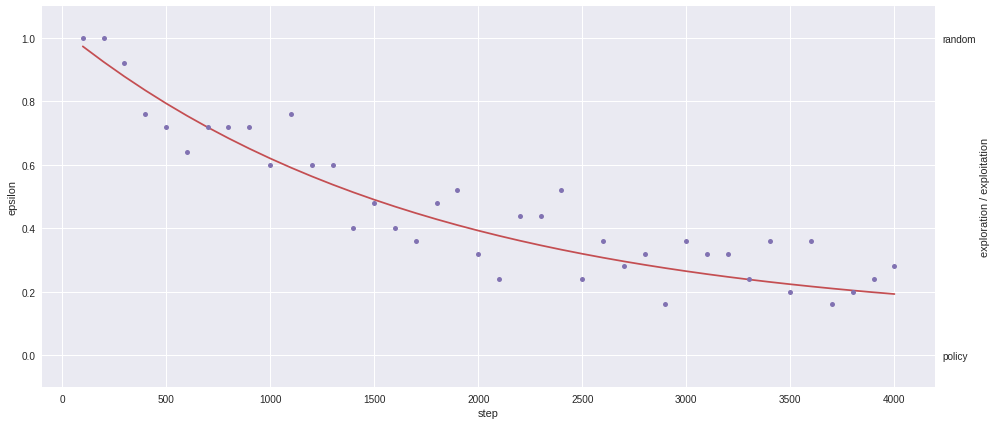

In [43]:
plt.figure(figsize=(16, 7))
plt.xlabel('step')
plt.ylim(-0.1, 1.1)
plt.ylabel('epsilon')
plt.twinx()
plt.ylabel('exploration / exploitation')
plt.yticks([0, 1], ('policy', 'random'))
plt.ylim(-0.1, 1.1)
plt.plot(steps, epsilon, '-', ms=3, color='C8')
plt.plot(steps, explored, 'o', ms='5', color='C9')

### Plot of reward in each step

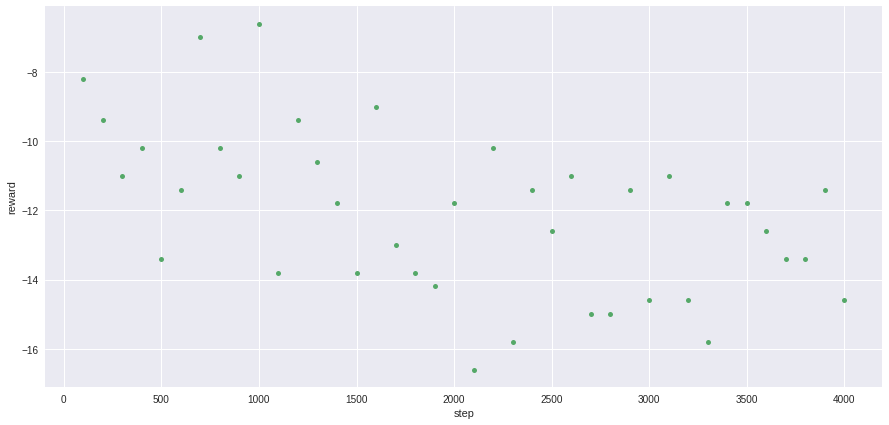

In [47]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('reward')
plt.plot(steps, reward, 'o', ms=5, color='C1')

### Plot of loss over training period

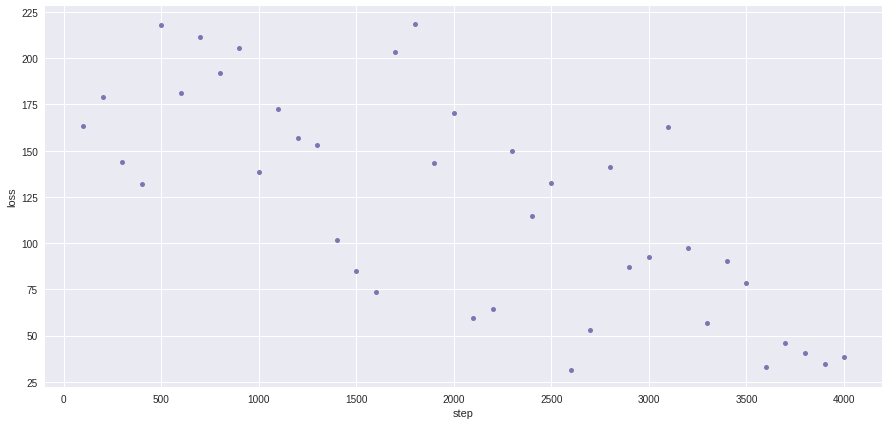

In [48]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('loss')
plt.plot(steps, loss, 'o', ms=5, color='C3')